# Loading the neccessary Libraries 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data set

In [2]:
# Load the dataset
data = pd.read_csv('/Users/vagalaganiupender/Downloads/bank-additional/bank-additional-full.csv',delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Checking Null Values

In [3]:
# checkig the data info 
data.info()
#checking the null values in the data set 
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Data Pre-Processing 

In [5]:
# Separate categorical and numerical features
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Load the dataset
data_encoded = pd.get_dummies(data, columns=categorical_cols)

In [6]:
# Prepare the feature matrix X and the target variable y
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Converting the Categorical value in to Numeric Labels 

In [7]:
# Convert categorical target variable to numeric labels
y_numeric = pd.Categorical(y).codes

# Splitting the Data set in to Train data set and Test data set 

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Logistic Regression Model implementation on Data set (All Variables) 

In [10]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.911143481427531


/Users/vagalaganiupender/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Plotting for Logistic Regression 

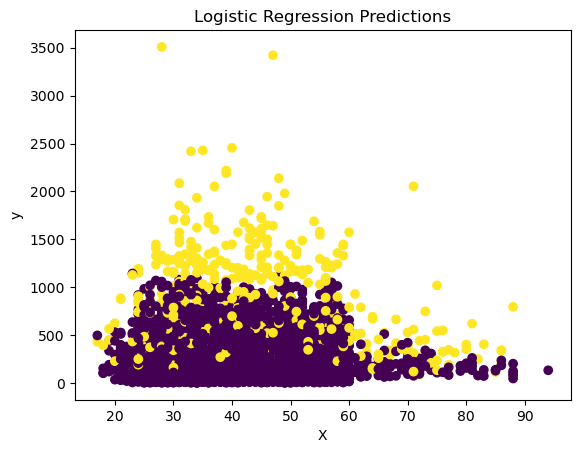

In [11]:
# Plot
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=logreg_predictions, cmap='viridis')
plt.title("Logistic Regression Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Support Vector Machine Learning Model Implementation on the Data Set

In [12]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.894634620053411


# Plotting for SVM Prediction 

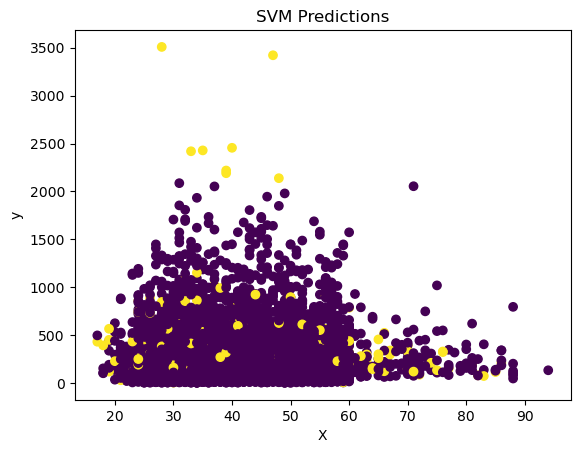

In [13]:
# Plotting for SVM
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=svm_predictions, cmap='viridis')
plt.title("SVM Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# K-means Clustering Model Implementation on the Data Set 

In [15]:
# K-means Clustering
kmeans = KMeans(n_clusters=5)  # Set the number of clusters
kmeans.fit(X)
kmeans_labels = kmeans.labels_

# Calculate accuracy for K-means Clustering
kmeans_accuracy = accuracy_score(y_numeric, kmeans_labels)
print("K-means Accuracy:", kmeans_accuracy)

K-means Accuracy: 0.6119986403806934


# Plotting of K-Means Clustering 

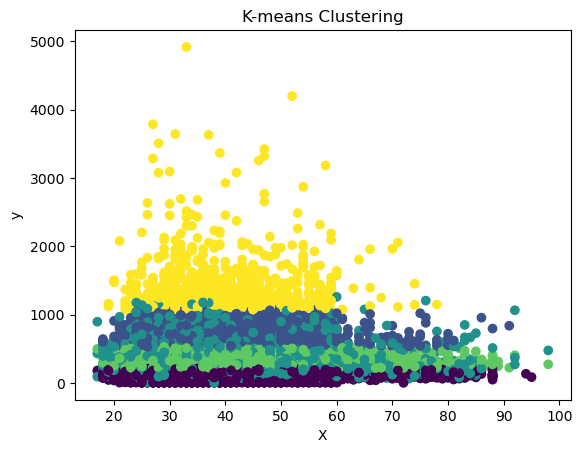

In [16]:
# Plotting for K-means Clustering
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Findig the Class imbalance in the Data Set 

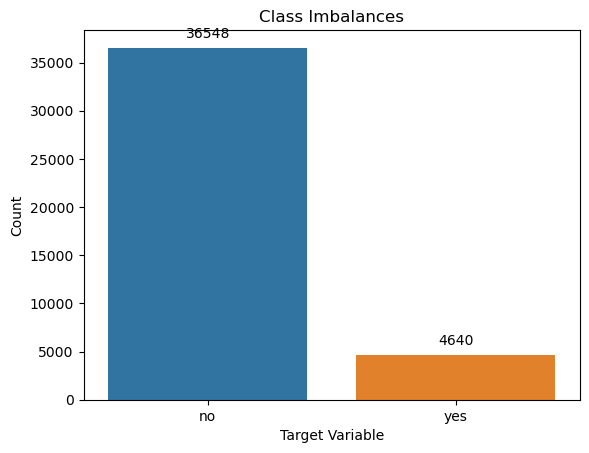

In [18]:
# Assuming target variable column is named 'y'
ax=sns.countplot(x="y", data=data)
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Class Imbalances')
# Add count labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

# Finding the Best Features in the data set which effect Target Variable 

In [ ]:
# Calculate feature importance using absolute coefficient values
importance_scores = abs(logreg.coef_[0])
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance (Logistic Regression):")
feature_importance.head()

# Selecting the Features according the Feature Importance 

In [19]:
# Select the important features
selected_features = ['cons.price.idx', 'month_may', 'euribor3m', 'emp.var.rate']

# Preapring the data 

In [20]:
# Prepare the feature matrix X and the target variable y
X = data_encoded[selected_features]
y = data_encoded['y']

# Convert categorical target variable to numeric labels
y_numeric = pd.Categorical(y).codes

# Preparing the Test and train the data 

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)
X_train

,cons.price.idx,month_may,euribor3m,emp.var.rate
12556,93.918,0,4.960,1.4
35451,92.893,1,1.244,-1.8
30592,92.893,1,1.354,-1.8
17914,93.918,0,4.961,1.4
3315,93.994,1,4.860,1.1
...,...,...,...,...
6265,93.994,1,4.857,1.1
11284,94.465,0,4.961,1.4
38158,92.431,0,0.754,-3.4
860,93.994,1,4.856,1.1


# Implementing the Logistic Regression (Selected Features)

In [22]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.885773245933479


# Plotting the Logistic Regression 

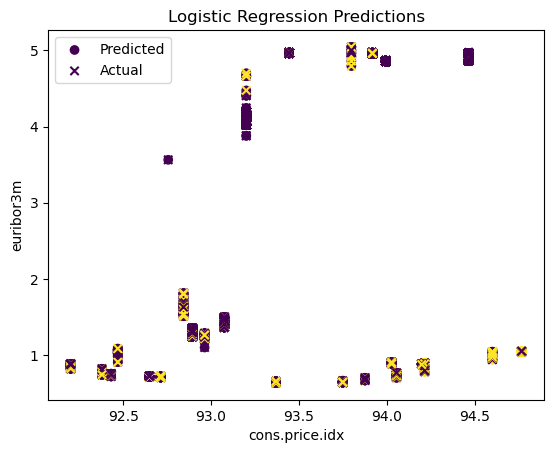

In [23]:
# Plotting for Logistic Regression with target variable
plt.scatter(X_test['cons.price.idx'], X_test['euribor3m'], c=logreg_predictions, cmap='viridis', label='Predicted')
plt.scatter(X_test['cons.price.idx'], X_test['euribor3m'], c=y_test, cmap='viridis', marker='x', label='Actual')
plt.title("Logistic Regression Predictions")
plt.xlabel("cons.price.idx")
plt.ylabel("euribor3m")
plt.legend()
plt.show()

# SVM MODEL (Selected Features)

In [24]:
# SVM model 
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8865015780529255


# Plotting SVM Model 

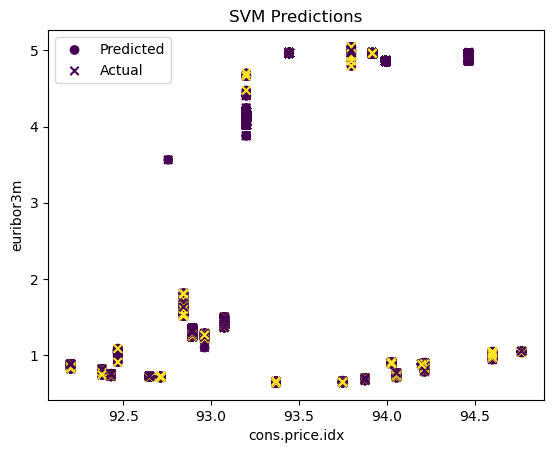

In [25]:
# Plotting for SVM with target variable
plt.scatter(X_test['cons.price.idx'], X_test['euribor3m'], c=svm_predictions, cmap='viridis', label='Predicted')
plt.scatter(X_test['cons.price.idx'], X_test['euribor3m'], c=y_test, cmap='viridis', marker='x', label='Actual')
plt.title("SVM Predictions")
plt.xlabel("cons.price.idx")
plt.ylabel("euribor3m")
plt.legend()
plt.show()

# K-means Clustering (Selected Features)

In [28]:
# K-means Clustering
kmeans = KMeans(n_clusters=2)  # Set the number of clusters
kmeans.fit(X)
kmeans_labels = kmeans.labels_

# K-means Clustering Accuracy
kmeans_accuracy = accuracy_score(y_numeric, kmeans_labels)
print("K-means Clustering Accuracy:", kmeans_accuracy)

K-means Clustering Accuracy: 0.7199184228416043


# Plotting K-Means Clustering  

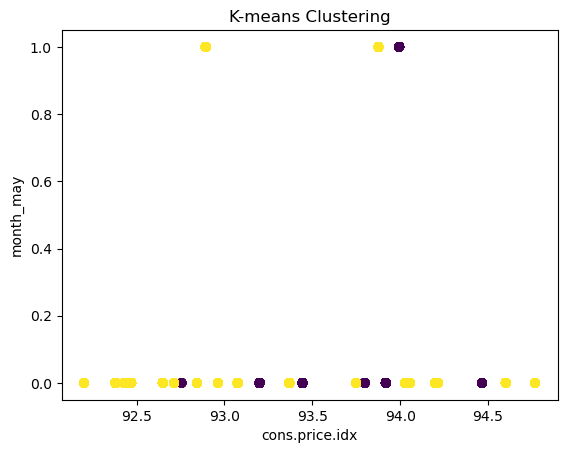

In [29]:
# Plotting for K-means Clustering
plt.scatter(X['cons.price.idx'], X['month_may'], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering")
plt.xlabel("cons.price.idx")
plt.ylabel("month_may")
plt.show()

>>>>>Scenario 1: Using All Variables
In this scenario, i applied the models using all the variables in the banking dataset. 

Logistic Regression Accuracy: 0.91
SVM Accuracy: 0.89
K-means Clustering Accuracy: 0.61

Explanation:

Based on the accuracy scores, the logistic regression model achieved the highest accuracy of 0.91, 
followed by the SVM model with an accuracy of 0.89. 
The K-means clustering model obtained a lower accuracy of 0.61.

This suggests that when using all variables, both logistic regression and SVM outperformed 
the K-means clustering model in terms of accuracy. 

>>>>Scenario 2: Using Selected Features

In this scenario, i applied the models using a selected subset of features from the banking dataset.the following accuracy scores were obtained:

Logistic Regression Accuracy: 0.88
SVM Accuracy: 0.88
K-means Clustering Accuracy: 0.72

>>>Explanation:
In this scenario, both logistic regression and SVM achieved high accuracy scores,
indicating their effectiveness in predicting the target variable using the selected subset of features.


>>>In conclusion,when using a selected subset of features, 
SVM outperformed logistic regression with a higher accuracy score.
This suggests that SVM might have been able to capture the underlying 
patterns in the selected features more effectively in the banking dataset.